# problem statement
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data= pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
data.shape

(50, 5)

In [6]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data.corr()

C:\Users\ubed shaikh\AppData\Local\Temp\ipykernel_21428\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


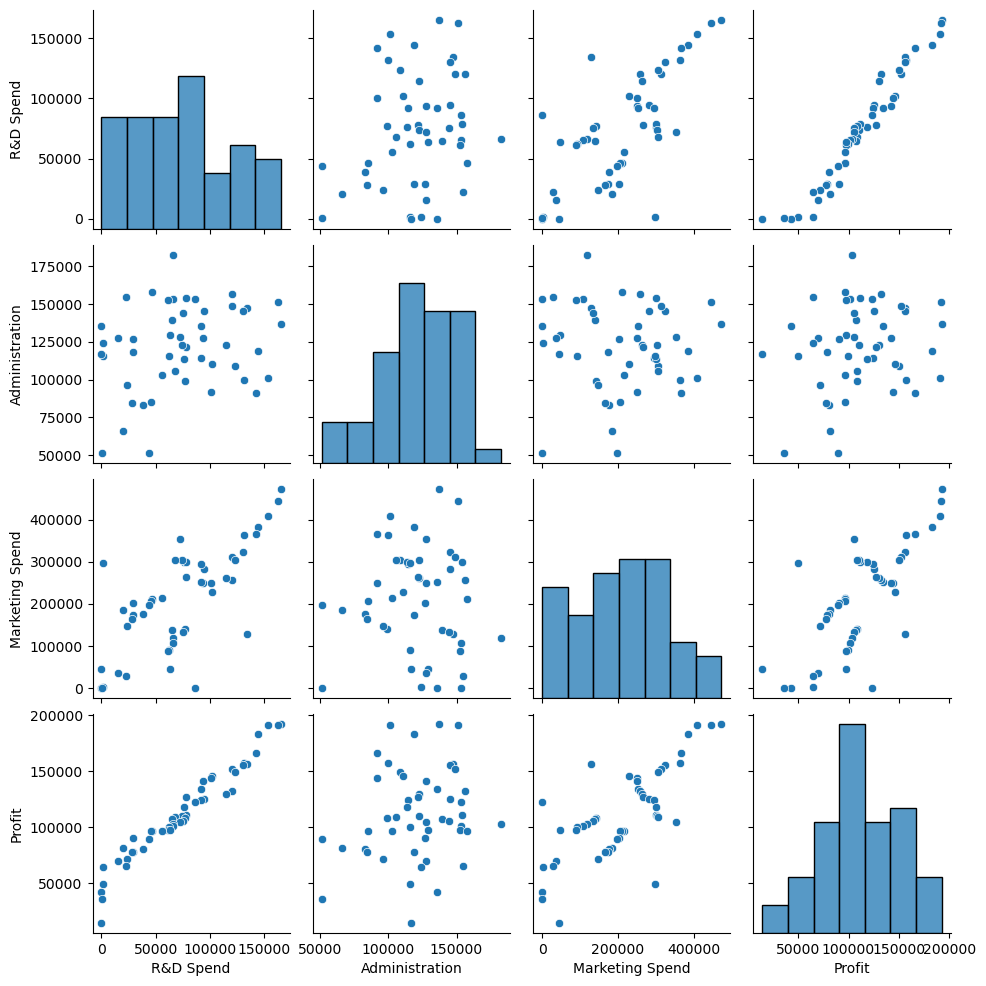

In [10]:
sns.pairplot(data.iloc[:,:])

In [11]:
RDspend=pd.DataFrame(data['R&D Spend'])
MSpend=pd.DataFrame(data['Marketing Spend'])

In [12]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDspend+Administration+MSpend',data=data).fit()

In [13]:
   model.params

Intercept         50122.192990
RDspend               0.805715
Administration       -0.026816
MSpend                0.027228
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RDspend           17.846374
Administration    -0.525507
MSpend             1.655077
dtype: float64 
 Intercept         1.057379e-09
RDspend           2.634968e-22
Administration    6.017551e-01
MSpend            1.047168e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           4.53e-30
Time:                        00:08:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDspend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MSpend             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ml_v=smf.ols('Profit~RDspend',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    19.320288
RDspend      29.151139
dtype: float64 
 Intercept    2.782697e-24
RDspend      3.500322e-32
dtype: float64


In [18]:
ml_v=smf.ols('Profit~Administration',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [19]:
ml_v=smf.ols('Profit~MSpend',data = data).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    7.808356
MSpend       7.802657
dtype: float64 
 Intercept    4.294735e-10
MSpend       4.381073e-10
dtype: float64


In [20]:
rsq_pro = smf.ols('Profit~RDspend+Administration+MSpend',data=data).fit().rsquared  
vif_pro = 1/(1-rsq_pro) 

rsq_rd = smf.ols('RDspend~Profit+Administration+MSpend',data=data).fit().rsquared  
vif_rd = 1/(1-rsq_rd) 

rsq_adm = smf.ols('Administration~Profit+RDspend+MSpend',data=data).fit().rsquared  
vif_adm = 1/(1-rsq_adm)

rsq_ms = smf.ols('MSpend~Administration+Profit+RDspend',data=data).fit().rsquared  
vif_ms = 1/(1-rsq_ms)

# Storing vif values in a data frame
d1 = {'Variables':['pro','rd','adm','ms'],'VIF':[vif_pro,vif_rd,vif_adm,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,pro,20.302917
1,rd,19.563001
2,adm,1.182146
3,ms,2.465332


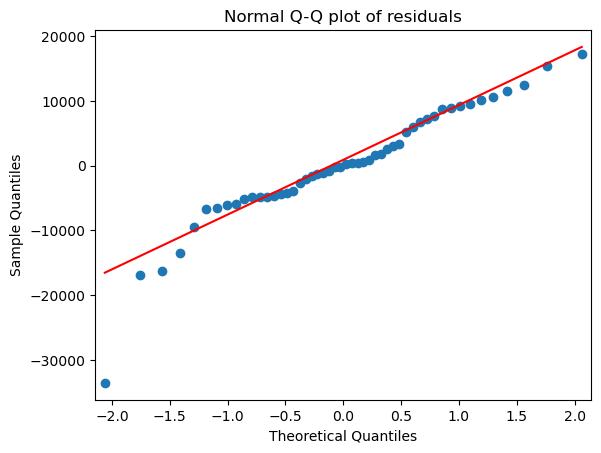

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

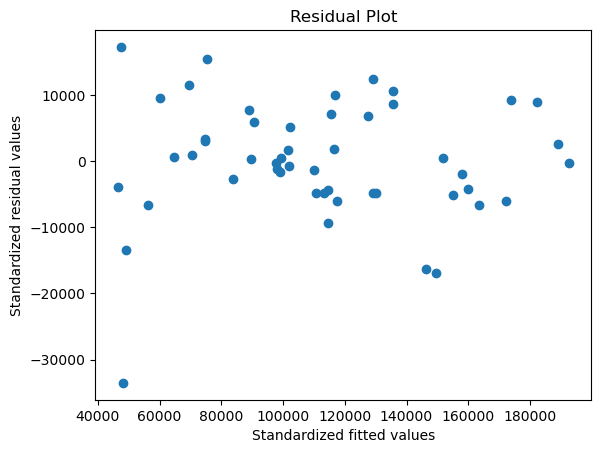

In [23]:
plt.scatter((model.fittedvalues),
           (model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


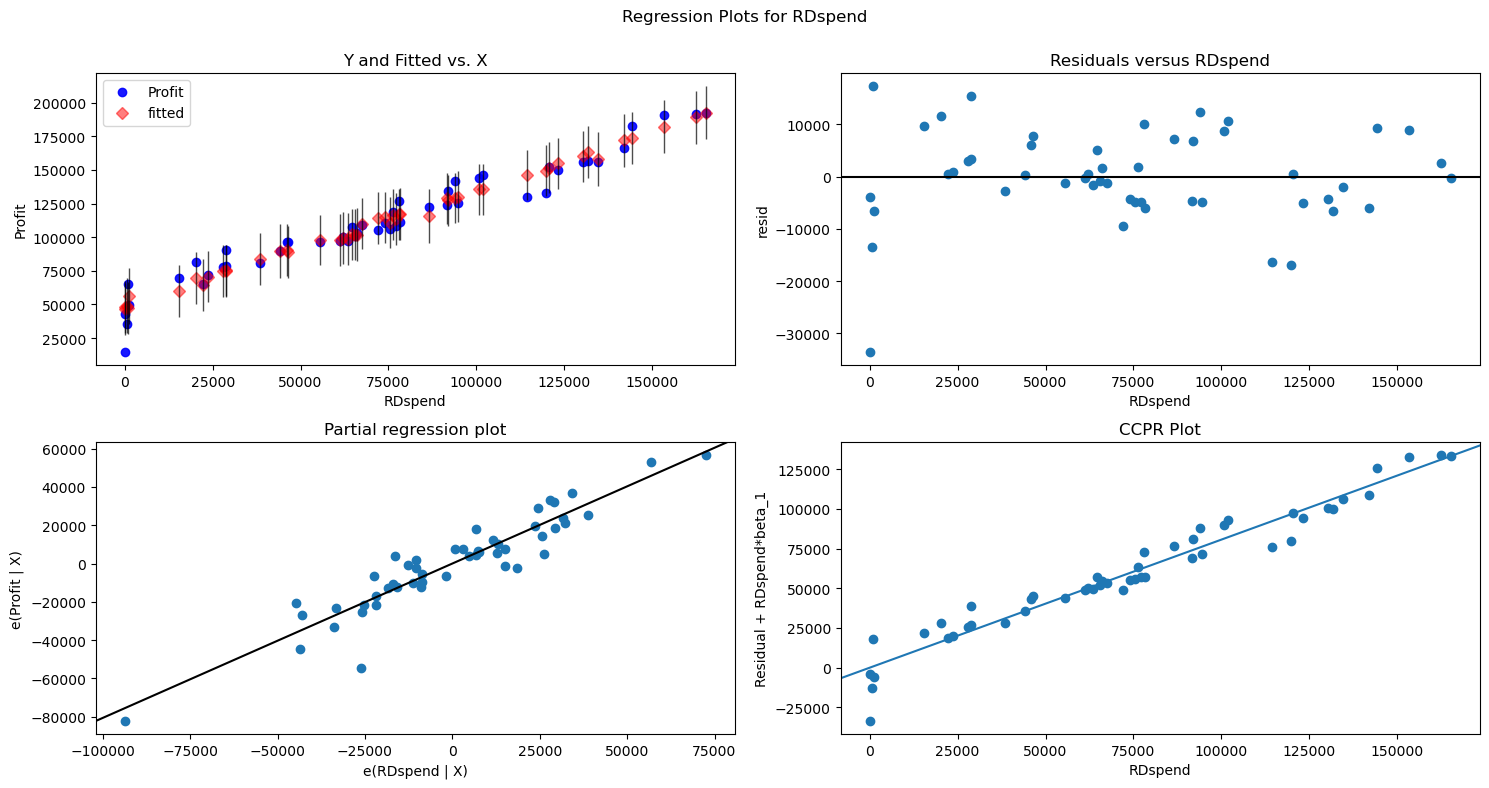

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDspend", fig=fig)
plt.show()

eval_env: 1


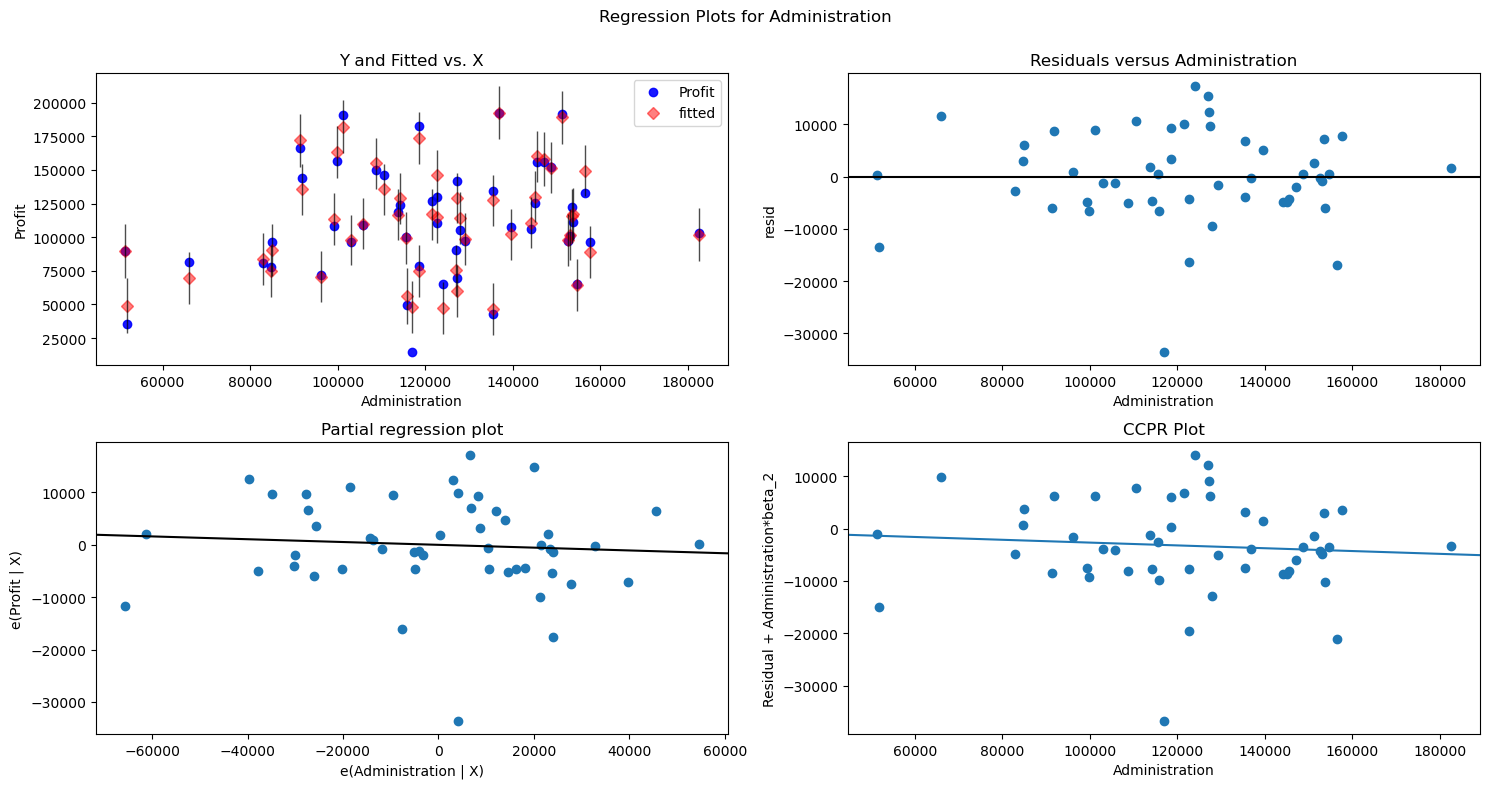

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


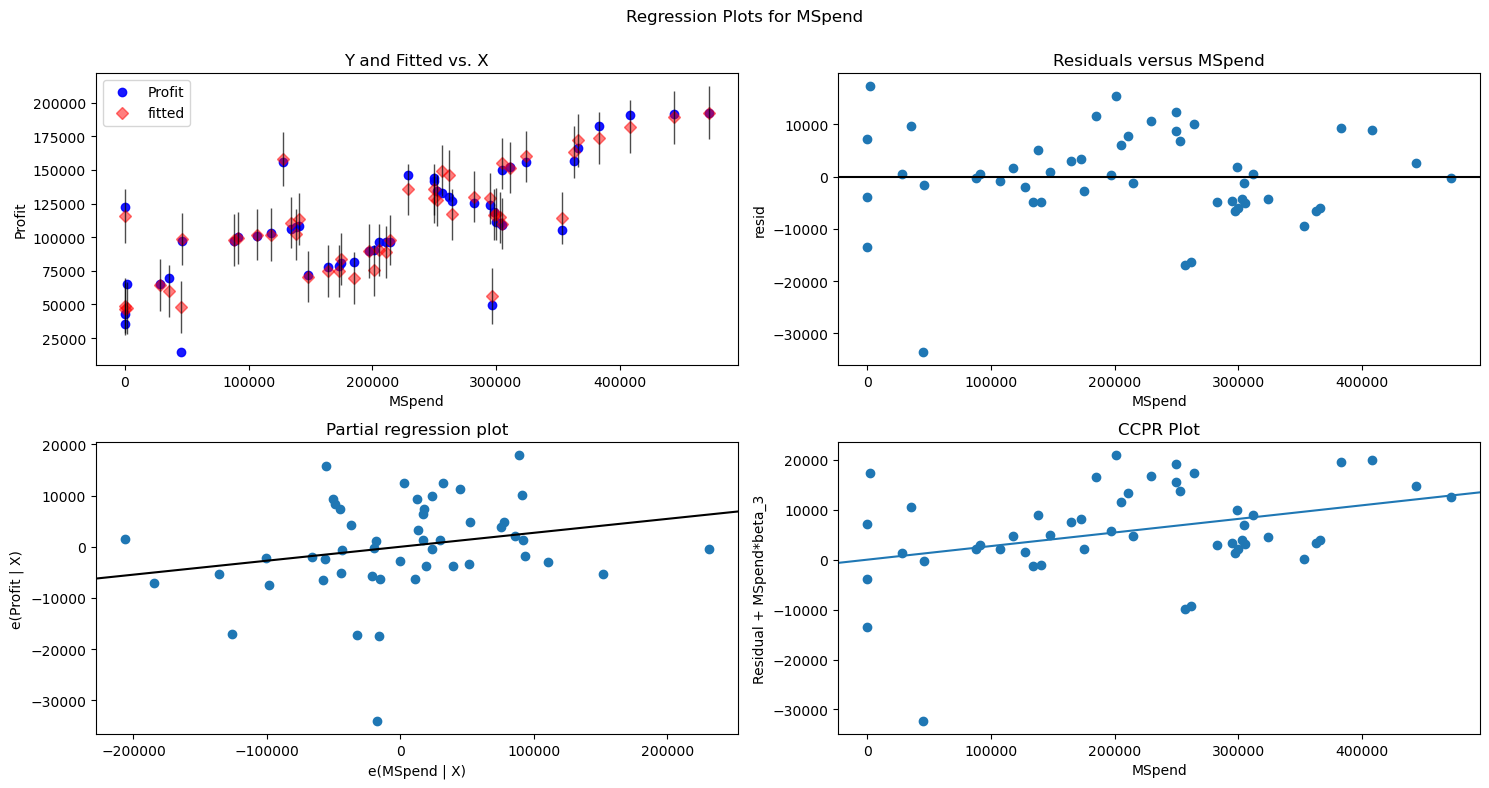

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MSpend", fig=fig)
plt.show()

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

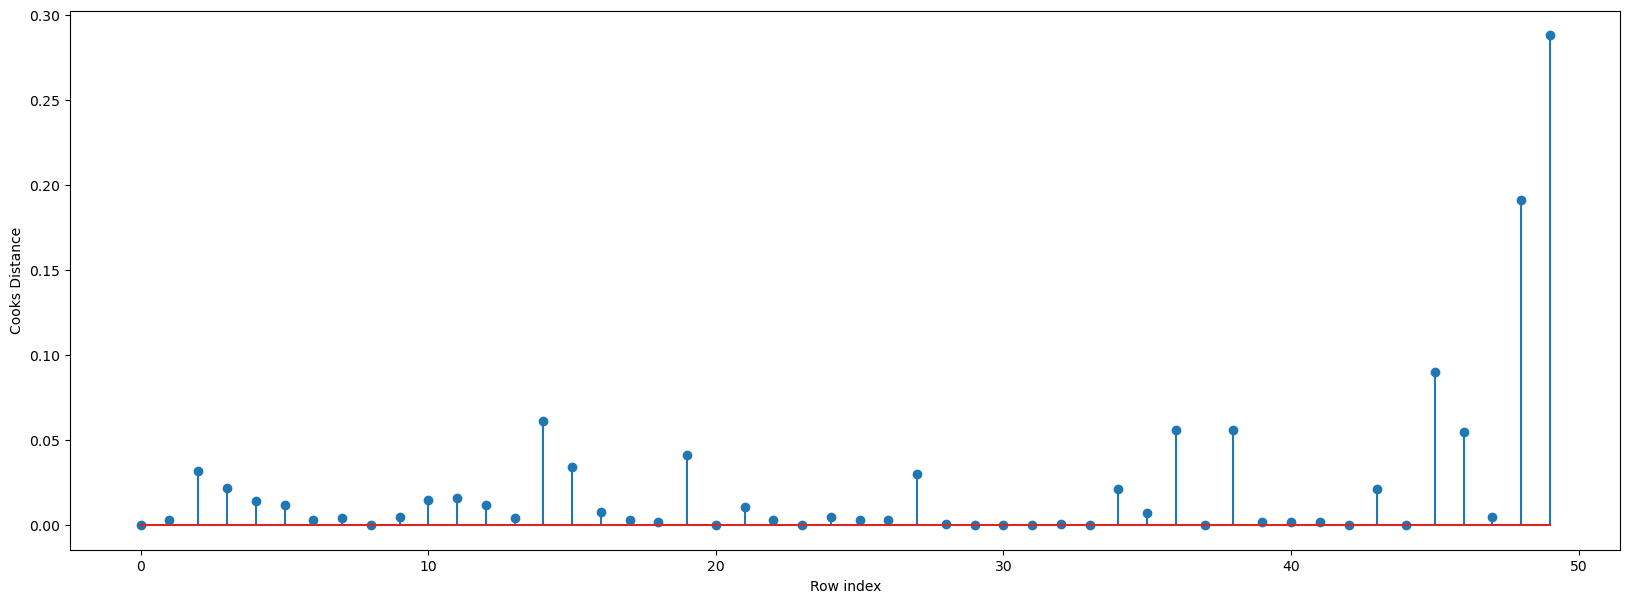

In [28]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

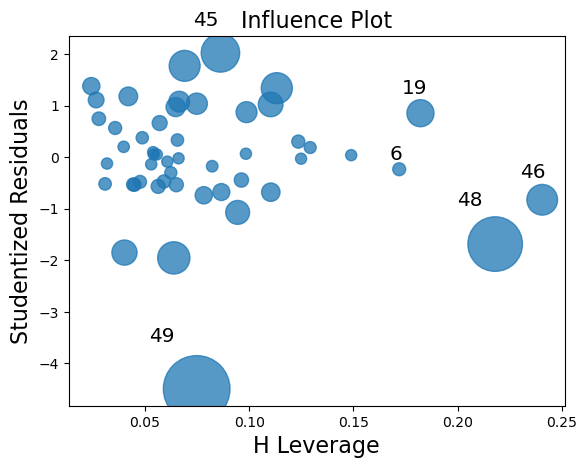

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [31]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [32]:
data[data.index.isin([49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [34]:
data_new = pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\50_Startups.csv")

In [37]:
data1=data_new.drop(data_new.index[[49]],axis=0).reset_index()
data1=data1.drop(['index'],axis=1)
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
RDspend=pd.DataFrame(data1['R&D Spend'])
MSpend=pd.DataFrame(data1['Marketing Spend'])

In [39]:
mod1 = smf.ols('Profit~RDspend+Administration+MSpend',data=data1).fit()

In [40]:
(mod1.rsquared,mod1.aic)

(0.9613162435129847, 1020.5652974526367)

In [41]:
model_influence_V = mod1.get_influence()
(c_V, _) = model_influence_V.cooks_distance

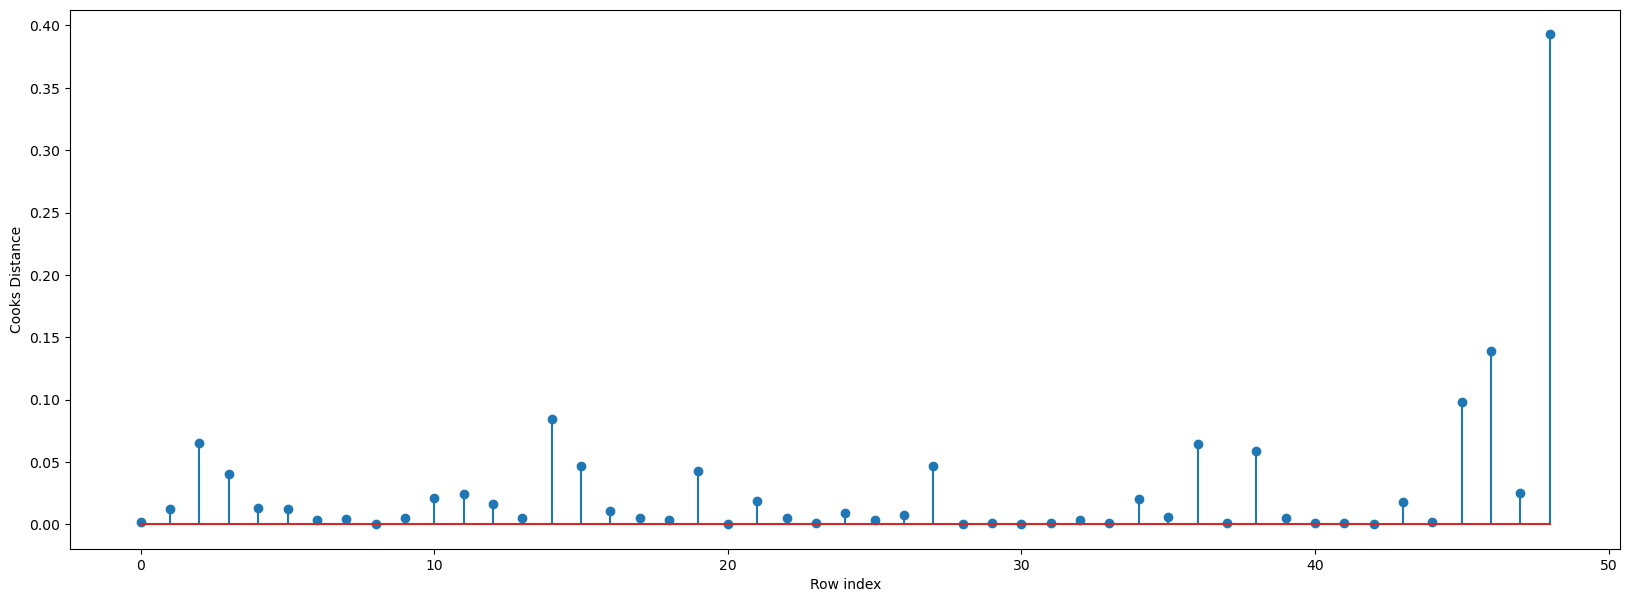

In [42]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [43]:
(np.argmax(c_V),np.max(c_V))

(48, 0.39274420556321527)

the value is less than 1 we can stop dygnostic process and finalize the model.